# <font color='brown'> Análise de dados - Semantix
    
1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
4. O resultado da campanha anterior tem relevância na campanha atual?
5. Qual o fator determinante para que o banco exija um seguro de crédito?
6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
full = pd.read_csv('bank-full.csv',sep=';') 

bank = pd.read_csv('bank.csv',sep=';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


#### dicionario de dados

### bank client data:
1 - age (numeric)

2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

4 - education (categorical: "unknown","secondary","primary","tertiary")

5 - default: has credit in default? (binary: "yes","no")

6 - balance: average yearly balance, in euros (numeric) 

7 - housing: has housing loan? (binary: "yes","no")

8 - loan: has personal loan? (binary: "yes","no")

### related with the last contact of the current campaign:
9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 

10 - day: last contact day of the month (numeric)

11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

12 - duration: last contact duration, in seconds (numeric)

### other attributes:
13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

15 - previous: number of contacts performed before this campaign and for this client (numeric)

16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

In [5]:
bank.shape

(4521, 17)

In [6]:
bank['default'] = bank['default'].apply(lambda x: 0 if x == 'no' else 1)

bank['housing'] = bank['housing'].apply(lambda x: 0 if x == 'no' else 1)

bank['loan'] = bank['loan'].apply(lambda x: 0 if x == 'no' else 2)

In [7]:
full['default'] = full['default'].apply(lambda x: 0 if x == 'no' else 1)

full['housing'] = full['housing'].apply(lambda x: 0 if x == 'no' else 1)

full['loan'] = full['loan'].apply(lambda x: 0 if x == 'no' else 2)

In [8]:
#unindo os campos de empréstimo, se for housing = 1, se for loan = 2, se possuir os dois = 3, se nãp possuir emprestimo = 0

bank["total_loans"] = bank["housing"] + bank["loan"]
full["total_loans"] = full["housing"] + full["loan"]
    
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,total_loans
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,no,0
1,33,services,married,secondary,0,4789,1,2,cellular,11,may,220,1,339,4,failure,no,3
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,no,1
3,30,management,married,tertiary,0,1476,1,2,unknown,3,jun,199,4,-1,0,unknown,no,3
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,no,1


In [9]:
bank.describe()
#o comando 'describe' é utilizado para mostrar a distribuição estatistica dos dados

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.00000
mean,41.170095,0.016810,1422.657819,0.566025,0.305685,15.915284,263.961292,2.793630,39.766645,0.542579,0.87171
std,10.576211,0.128575,3009.638142,0.495676,0.719750,8.247667,259.856633,3.109807,100.121124,1.693562,0.88142
min,19.000000,0.000000,-3313.000000,0.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000,0.00000
25%,33.000000,0.000000,69.000000,0.000000,0.000000,9.000000,104.000000,1.000000,-1.000000,0.000000,0.00000
50%,39.000000,0.000000,444.000000,1.000000,0.000000,16.000000,185.000000,2.000000,-1.000000,0.000000,1.00000
75%,49.000000,0.000000,1480.000000,1.000000,0.000000,21.000000,329.000000,3.000000,-1.000000,0.000000,1.00000
max,87.000000,1.000000,71188.000000,1.000000,2.000000,31.000000,3025.000000,50.000000,871.000000,25.000000,3.00000


In [10]:
bank.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
total_loans    0
dtype: int64

In [11]:
full.isnull().sum()

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
total_loans    0
dtype: int64

In [12]:
full.groupby(['job']).count()

,age,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,total_loans
job,,,,,,,,,,,,,,,,,
admin.,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171,5171
blue-collar,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732,9732
entrepreneur,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487,1487
housemaid,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240,1240
management,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458,9458
retired,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264,2264
self-employed,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579,1579
services,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154,4154
student,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938,938


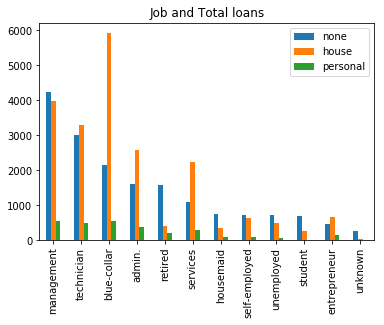

In [13]:
job_loan = pd.DataFrame()

job_loan['none'] = full[full['total_loans'] == 0]['job'].value_counts()
job_loan['house'] = full[full['total_loans'] == 1 ]['job'].value_counts()
job_loan['personal'] = full[full['total_loans'] == 2]['job'].value_counts()
#job_loan['both'] = bank[bank['total_loans'] == 3]['job'].value_counts()/bank['total_loans'].count()*100

job_loan.plot.bar(title = 'Job and Total loans')

In [14]:
job_loan

,none,house,personal
management,4233,3972,547
technician,2989,3299,493
blue-collar,2133,5915,551
admin.,1602,2578,387
retired,1565,390,208
services,1091,2227,297
housemaid,750,338,92
self-employed,715,635,99
unemployed,714,480,46
student,681,245,8


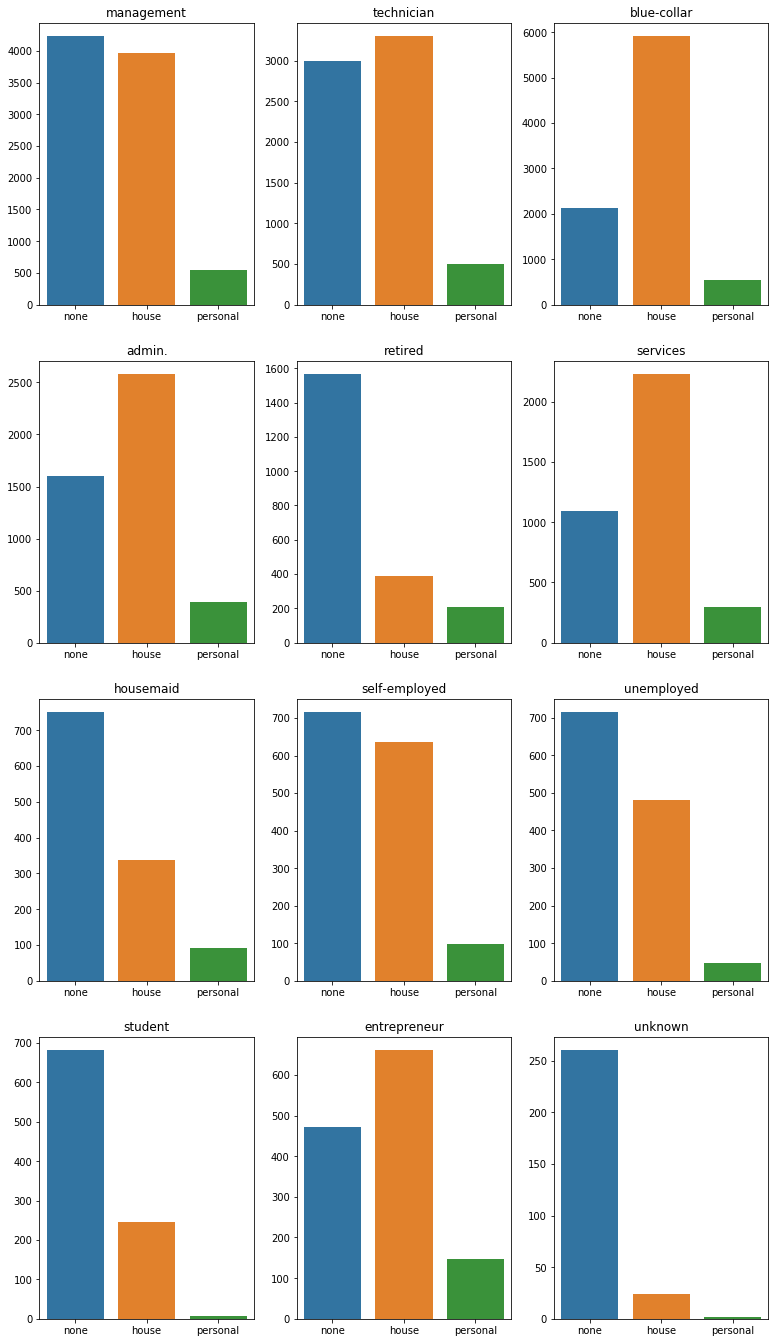

In [15]:
plt.figure(figsize=(15,15))
plt.subplots_adjust(bottom=-0.3, right=0.8, top=0.9)
for i,job in enumerate(job_loan.index):
    aux = job_loan[job_loan.index == job].copy()
    plt.subplot(4,3,i+1)
    plt.title(job)
    sns.barplot(x=aux.columns,y=aux.values[0])
   
plt.show()
    

## <font color='blue'> Resposta 1
## Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
## blue-collar é a profissão com maior tendencia de realizar um emprestimo. Na maioria massacrante das vezes do tipo 'housing'

In [16]:
full.groupby(['poutcome']).sum()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
poutcome,,,,,,,,,,,
failure,199893,39,7183913,3470,1548,69431,1196755,9708,1183637,14196,5018
other,73144,16,2736837,1199,530,26634,470516,4529,422618,7377,1729
success,64920,2,2930284,471,164,21833,478789,2729,246685,4647,635
unknown,1512810,758,48738648,19990,12246,596726,9525751,107990,-35556,17,32236


In [17]:
full.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.114810
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,0.059439
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.106381
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,0.583885
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,0.835271
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.006160
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.007292
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.004878
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.049848
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.011430


In [18]:
novopd = full[['poutcome','campaign']]

In [19]:
novopd.groupby('poutcome').count()

,campaign
poutcome,
failure,4901
other,1840
success,1511
unknown,36959


In [20]:
sucesso =  novopd.loc[novopd['poutcome']=='success']
sucesso.describe()

,campaign
count,1511.000000
mean,1.806089
std,1.269141
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,11.000000


In [21]:
falha =  novopd.loc[novopd['poutcome']=='failure']
falha.describe()

,campaign
count,4901.000000
mean,1.980820
std,1.470818
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,15.000000


(array([2458., 1374.,  500.,  242.,  140.,   87.,   52.,   22.,   10.,
           6.,    4.,    4.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 12 Patch objects>)

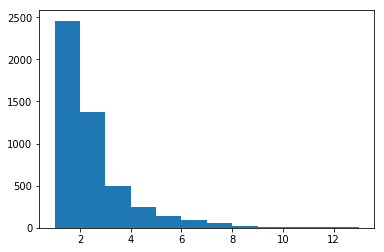

In [22]:
plt.hist(falha.campaign,bins=range(1,14,1))

(array([837., 402., 149.,  51.,  30.,  21.,  11.,   8.,   1.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

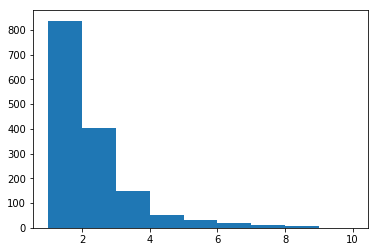

In [23]:
plt.hist(sucesso.campaign,bins=range(1,11,1))

## <font color='blue'> Resposta 2 e 3
    
2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

### não há uma correlação clara entre o número de ligações e o sucesso da campanha isoladamente.

3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

### o número médio de ligações deveria ser de no mínimo 2 por cliente visto que 25% do sucesso ocorreu no segundo contato, o número médio deve ser 4 pois ainda apresenta uma porcentagem relevante de sucesso. O máximo deve ser 8, após esse número não houve nenhum caso de sucesso.


In [24]:
previopd = full[['poutcome','previous']]

In [25]:
previopd.groupby('poutcome').count()

,previous
poutcome,
failure,4901
other,1840
success,1511
unknown,36959


In [26]:
psucesso =  previopd.loc[previopd['poutcome']=='success']
psucesso.describe()

,previous
count,1511.000000
mean,3.075447
std,2.593854
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,28.000000


In [27]:
pfalha =  previopd.loc[previopd['poutcome']=='failure']
pfalha.describe()

,previous
count,4901.000000
mean,2.896552
std,3.130252
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,55.000000


(array([473., 352., 244., 144.,  90.,  67.,  44.,  29.,  36.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

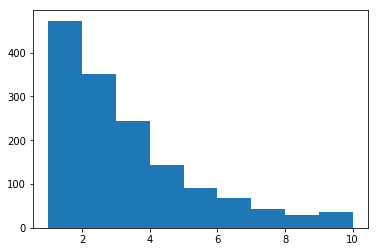

In [28]:
plt.hist(psucesso.previous,bins=range(1,11,1))

(array([1707., 1362.,  660.,  405.,  261.,  146.,  101.,   54.,   77.]),
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 9 Patch objects>)

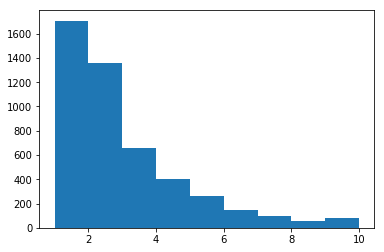

In [29]:
plt.hist(pfalha.previous,bins=range(1,11,1))

4. Resposta

A curva é bem semelhante, mas há uma diferença consideravel de sucesso nas pessoas que foram contactadas pelo menos 3 vezes

In [30]:
full.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,-0.114810
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,0.059439
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,-0.106381
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,0.583885
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,0.835271
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.006160
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,-0.007292
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.004878
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.049848
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.011430


In [31]:
house = full.loc[full['housing']==1]
house.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
count,25130.000000,25130.000000,25130.000000,25130.0,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000,25130.000000
mean,39.175288,0.017310,1175.103064,1.0,0.347553,15.598249,259.331476,2.698488,51.312495,0.656665,1.347553
std,8.926807,0.130426,2483.285761,0.0,0.757849,8.026836,258.321907,3.140979,113.862848,2.707428,0.757849
min,20.000000,0.000000,-4057.000000,1.0,0.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,32.000000,0.000000,62.000000,1.0,0.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,38.000000,0.000000,412.000000,1.0,0.000000,15.000000,182.000000,2.000000,-1.000000,0.000000,1.000000
75%,45.000000,0.000000,1257.750000,1.0,0.000000,21.000000,318.000000,3.000000,-1.000000,0.000000,1.000000
max,78.000000,1.000000,58544.000000,1.0,2.000000,31.000000,4918.000000,63.000000,854.000000,275.000000,3.000000


(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.600e+01,
        1.860e+02, 4.750e+02, 9.240e+02, 1.414e+03, 2.242e+03, 2.595e+03,
        2.481e+03, 2.188e+03, 1.844e+03, 1.721e+03, 1.486e+03, 1.382e+03,
        1.190e+03, 1.020e+03, 9.560e+02, 8.440e+02, 7.260e+02, 6.170e+02,
        5.360e+02, 2.160e+02, 2.100e+01, 9.000e+00, 5.000e+00, 4.000e+00,
        2.000e+00, 3.000e+00, 3.000e+00, 4.000e+00]),
 array([10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42,
        44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76,
        78]),
 <a list of 34 Patch objects>)

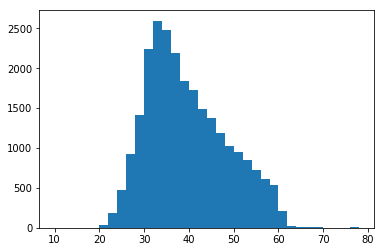

In [32]:
plt.hist(house.age,bins=range(10,80,2))

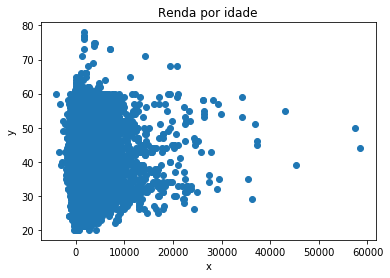

In [33]:
y = house.age
x = house.balance

plt.scatter(x, y)
plt.title('Renda por idade')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [34]:
house.groupby(['marital']).sum()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
marital,,,,,,,,,,,
divorced,126484,66,3025054,2907,1000,44918,766801,7493,158487,1963,3907
married,624624,243,18419288,15321,5942,240453,3887386,42280,741584,9727,21263
single,233367,126,8085998,6902,1792,106613,1862813,18040,389412,4812,8694


In [35]:
house.groupby(['education']).sum()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
education,,,,,,,,,,,
primary,164674,69,3923570,3894,1160,59467,1005438,10944,192768,2261,5054
secondary,539689,244,14514594,14038,5310,218266,3649083,37057,741470,8839,19348
tertiary,244970,102,10102610,6378,2116,101250,1646610,17370,316991,4955,8494
unknown,35142,20,989566,820,148,13001,215869,2442,38254,447,968


In [36]:
house.groupby(['default']).sum()

,age,balance,housing,loan,day,duration,campaign,pdays,previous,total_loans
default,,,,,,,,,,
0,968004,29614920,24695,8468,385202,6412669,66486,1277007,16344,33163
1,16471,-84580,435,266,6782,104331,1327,12476,158,701


6.Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

A maioria dos clientes com acesso a emprestimo imobiliario, tem entre 28 e 50 anos, casado, com educação secundária, e não possui crédito padrão.

# <font color='brown'> Respostas
    
1. Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?
##### blue-collar é a profissão com maior tendencia de realizar um emprestimo. Na maioria massacrante das vezes do tipo 'housing'


2. Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?
##### não há uma correlação clara entre o número de ligações e o sucesso da campanha isoladamente.


3. Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?
##### o número médio de ligações deveria ser de no mínimo 2 por cliente visto que 25% do sucesso ocorreu no segundo contato, o número médio deve ser 4 pois ainda apresenta uma porcentagem relevante de sucesso. O máximo deve ser 8, após esse número não houve nenhum caso de sucesso.


4. O resultado da campanha anterior tem relevância na campanha atual?
##### A curva é bem semelhante, mas há uma diferença consideravel de sucesso nas pessoas que foram contactadas pelo menos 3 vezes


5. Qual o fator determinante para que o banco exija um seguro de crédito?
##### Não entendi no dataset qual seria o campo de seguro de crédito.


6. Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?
##### A maioria dos clientes com acesso a emprestimo imobiliario, tem entre 28 e 50 anos, casado, com educação secundária, e não possui crédito padrão.